## PATH DIR

In [1]:
import os
import sys

sep = os.path.sep
dir_actual = os.path.abspath('')
PATH = sep.join(dir_actual.split(sep)[:-1])
DIR_DATA = PATH + '{0}laboratories{0}data{0}'.format(os.sep)
sys.path.append(PATH) if PATH not in list(sys.path) else None
DIR_DATA

'C:\\Users\\epuerta\\OneDrive - Universidad Tecnológica de Bolívar\\Apps\\AppsISCO\\InteligenciaArtificial-ISCO-A06A\\laboratories\\data\\'

## Python Libraries

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
filename = DIR_DATA + 'Iris.csv'

In [4]:
data = pd.read_csv(filename, sep = ',')

In [5]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
data.columns=['Id', 'Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

# Preview of Data
- There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).
- There are no null values, so we don't have to worry about that.
- There are 50 observations of each species (setosa, versicolor, virginica).

In [7]:
data.head()

,Id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
data.describe()

,Id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Data Visualization
- After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a iris-setosa (in pink) is distinctly different from those of the other two species.
- There is some overlap in the pairwise relationships of the other two species, iris-versicolor (brown) and iris-virginica (green).

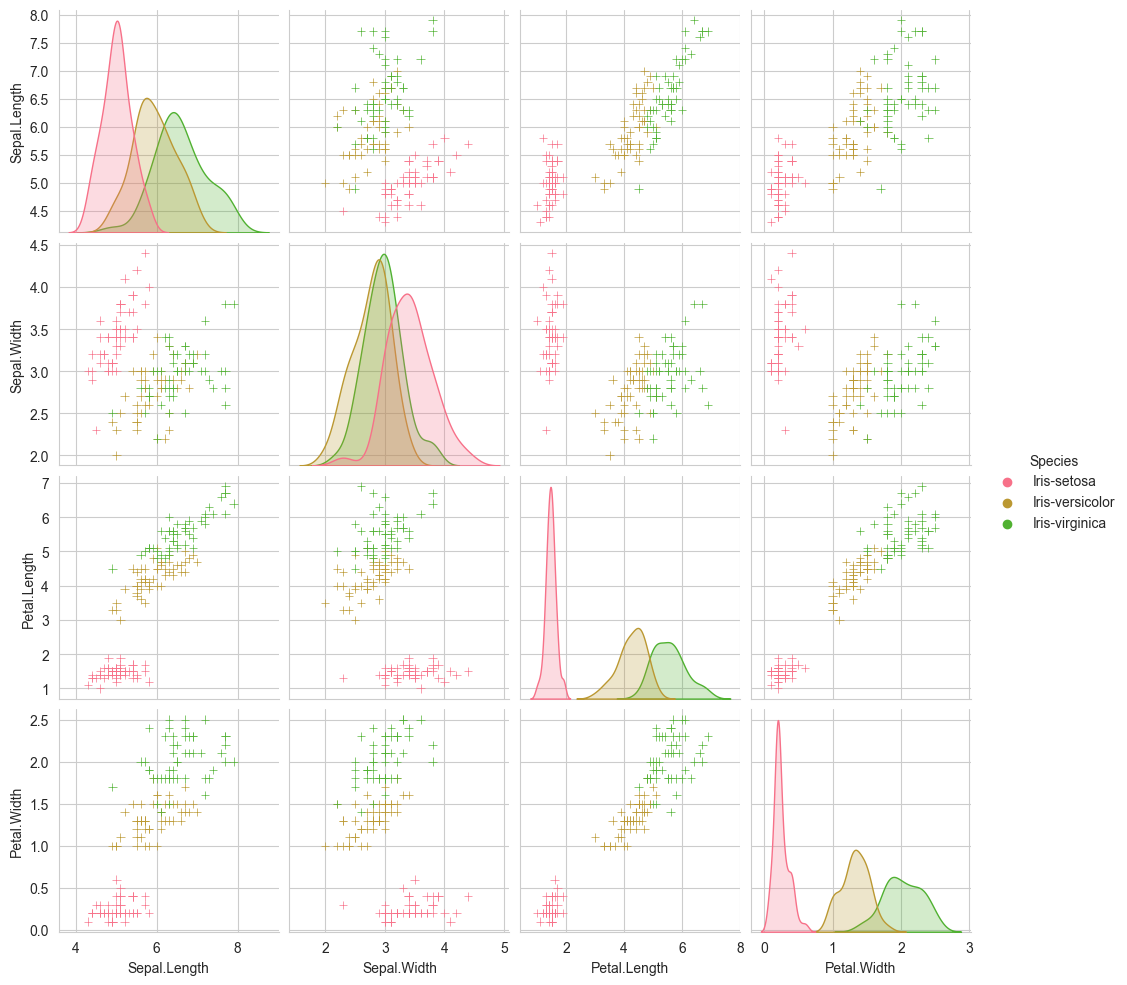

In [11]:
tmp = data.drop('Id', axis=1)
g = sns.pairplot(tmp, hue='Species', markers='+')
plt.show()

In [12]:
list(data.keys())

['Id', 'Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

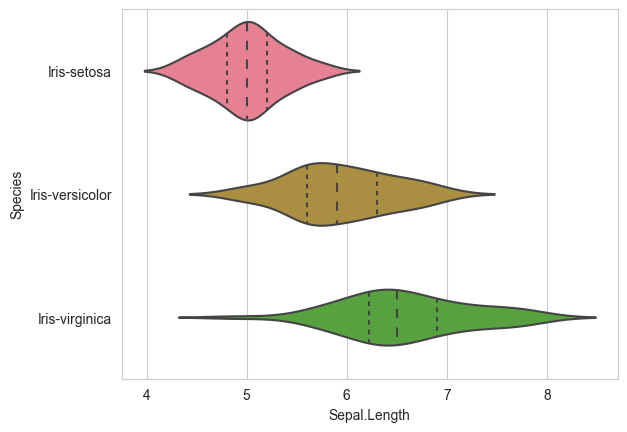

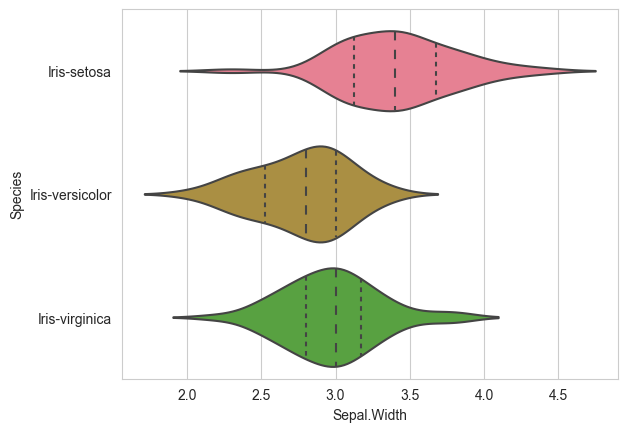

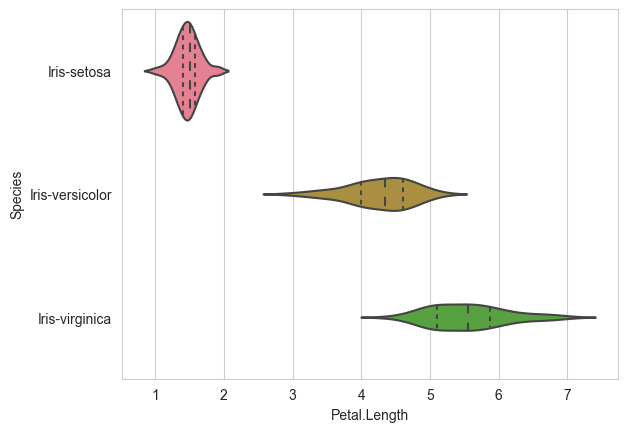

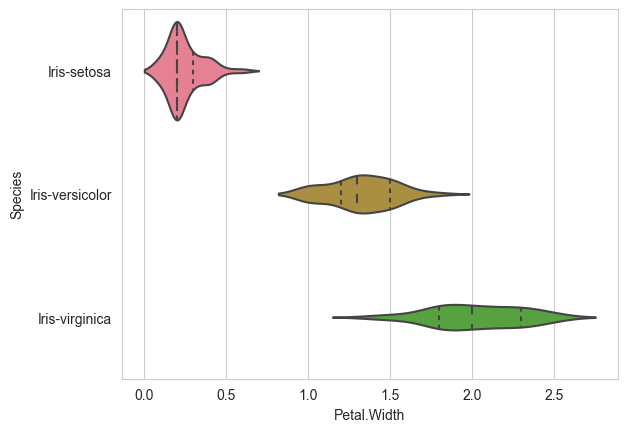

In [13]:
g = sns.violinplot(y='Species', x='Sepal.Length', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='Sepal.Width', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='Petal.Length', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='Petal.Width', data=data, inner='quartile')
plt.show()

# Modeling

In [14]:
X = data.drop(['Id', 'Species'], axis=1)
print(X.shape)
X

(150, 4)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
# Creating a instance of label Encoder.
le = LabelEncoder()
target = le.fit_transform(data['Species'])

In [16]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Split the dataset into a training set and a testing set
## Advantages
- By splitting the dataset pseudo-randomly into a two separate sets, we can train using one set and test using another.
- This ensures that we won't use the same observations in both sets.
- More flexible and faster than creating a model using all of the dataset for training.
## Disadvantages
- The accuracy scores for the testing set can vary depending on what observations are in the set.
- This disadvantage can be countered using k-fold cross-validation.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [18]:
# Instantiating LinearRegression() Model
lr = LinearRegression()

In [19]:
# Training/Fitting the Model
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
# Making Predictions
pred = lr.predict(X_test)
pred

array([ 1.24042717, -0.0470517 ,  2.24766081,  1.35145613,  1.29992031,
        0.01086695,  1.05103684,  1.82711171,  1.37586787,  1.06856218,
        1.70290027, -0.08634371, -0.16475544, -0.07704022, -0.03686594,
        1.39985227,  2.00557698,  1.04920521,  1.28290593,  1.97653781,
        0.01671723,  1.59884289,  0.07879941,  1.92338041,  1.85868954,
        1.88064781,  1.8044231 ,  2.04070546,  0.01997108,  0.01275306,
       -0.15594483, -0.0851098 ,  1.18613366, -0.00665099, -0.03059728,
        1.68967969,  1.29032331, -0.08105147, -0.09285881, -0.17301698,
        1.75510831,  1.37227344,  1.31790215, -0.07388053, -0.11485189])

In [21]:
# Evaluating Model's Performance
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.1539470110172433
Mean Squared Error: 0.038792063447133165
Mean Root Squared Error: 0.19695700913431125


In [25]:
d = {'Sepal.Length' : [4.6],
     'Sepal.Width' : [3.4],
     'Petal.Length' : [1.4],
     'Petal.Width' : [0.3],
     'species' : 0}
test_df = pd.DataFrame(data= d)
test_df
	

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,species
0,4.6,3.4,1.4,0.3,0


In [26]:
test = test_df.iloc[:, 0:4]
test

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,4.6,3.4,1.4,0.3


In [27]:
pred = lr.predict(test)
print('Predicted Sepal Length (cm):', pred[0])
print('Actual Sepal Length (cm):', 4.6)

Predicted Sepal Length (cm): 0.014963389969939844
Actual Sepal Length (cm): 4.6
